<a href="https://colab.research.google.com/github/shireen-mak/Healthcare-Data-Analysis/blob/main/Healthcare_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Importing The Dataset**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/healthcare_dataset.csv'
data1 = pd.read_csv(file_path)

# Step 1: Initial Inspection
print("Initial Data Info:")
print(data1.info())

print("\nPreview of Dataset:")
print(data1.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12

**Step 2: Handling The Missing Values**

In [ ]:
# Step 2: Handling Missing Values
# Identify columns with missing values
missing_values = data1.isnull().sum()
print("\nMissing Values Per Column:")
print(missing_values)


Missing Values Per Column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


**Step 3: Checking Duplicate Entries in The Dataset**

In [ ]:
# Check for duplicate rows
duplicates = data1.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    data2 = data1.drop_duplicates()
    print("Duplicates removed.")


Number of duplicate rows: 534
Duplicates removed.


**Step 5: Converting Some Variables in Datetime Format**

In [ ]:
# Check data types
print(data2.dtypes)

# Convert date columns to datetime format if needed
if 'Date of Admission' in data2.columns:
    data2['Date of Admission'] = pd.to_datetime(data2['Date of Admission'], errors='coerce')
if 'Discharge Date' in data2.columns:
    data2['Discharge Date'] = pd.to_datetime(data2['Discharge Date'], errors='coerce')


Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


<ipython-input-6-10836a6fc49c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Date of Admission'] = pd.to_datetime(data2['Date of Admission'], errors='coerce')
<ipython-input-6-10836a6fc49c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Discharge Date'] = pd.to_datetime(data2['Discharge Date'], errors='coerce')


**Step 6: Feature Engineering**

In [ ]:
# Add Length of Stay column
data2['Length of Stay'] = (data2['Discharge Date'] - data2['Date of Admission']).dt.days

# Check for negative or missing values in Length of Stay
print(data2['Length of Stay'].describe())
print(data2[data2['Length of Stay'] < 0])  # Investigate negative values


count    54966.000000
mean        15.499290
std          8.661471
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: Length of Stay, dtype: float64
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Length of Stay]
Index: []


<ipython-input-7-1a422bad77dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Length of Stay'] = (data2['Discharge Date'] - data2['Date of Admission']).dt.days


**Step 7: Saving The Cleaned Dataset**

In [ ]:
# Step 7: Final Inspection and Saving Cleaned Dataset
print("\nCleaned Data Info:")
print(data2.info())

print("\nPreview of Cleaned Dataset:")
print(data2.head())

# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/cleaned_healthcare_dataset.csv'
data2.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-n

**Plotting a Histogram Length of Stay VS Frequency**

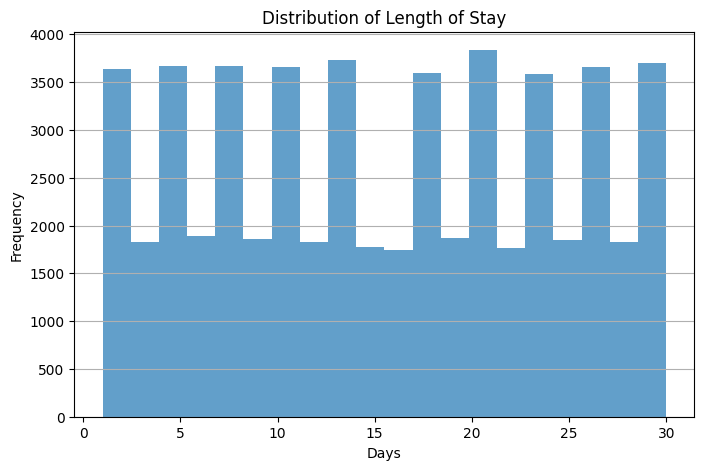

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
data2['Length of Stay'].plot.hist(bins=20, figsize=(8, 5), alpha=0.7)
plt.title("Distribution of Length of Stay")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


Admission Type
Elective     15.511178
Emergency    15.584134
Urgent       15.403839
Name: Length of Stay, dtype: float64


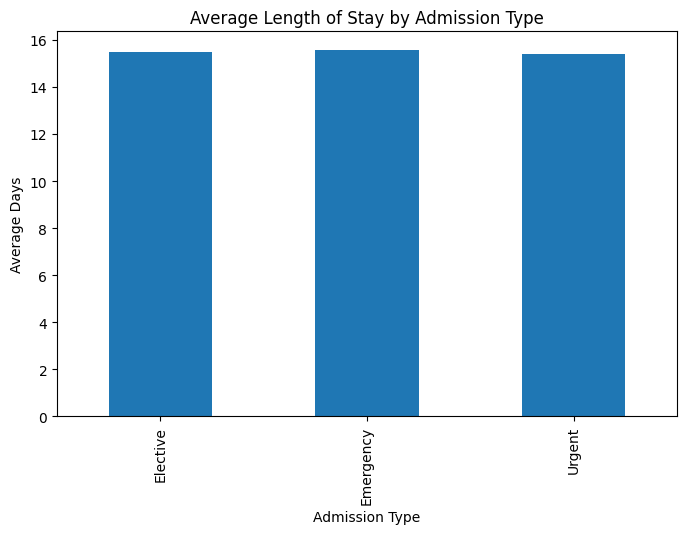

In [ ]:
avg_stay_by_admission = data2.groupby('Admission Type')['Length of Stay'].mean()
print(avg_stay_by_admission)

# Optionally, visualize
avg_stay_by_admission.plot(kind='bar', figsize=(8, 5))
plt.title("Average Length of Stay by Admission Type")
plt.ylabel("Average Days")
plt.xlabel("Admission Type")
plt.show()


**Plotting Length of Stay by Age Group**

<ipython-input-11-bebec0825b25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Age Group'] = pd.cut(data2['Age'], bins=[0, 18, 40, 60, 80, 100], labels=['0-18', '19-40', '41-60', '61-80', '81+'])
<ipython-input-11-bebec0825b25>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data2, x='Age Group', y='Length of Stay', palette="Set2")


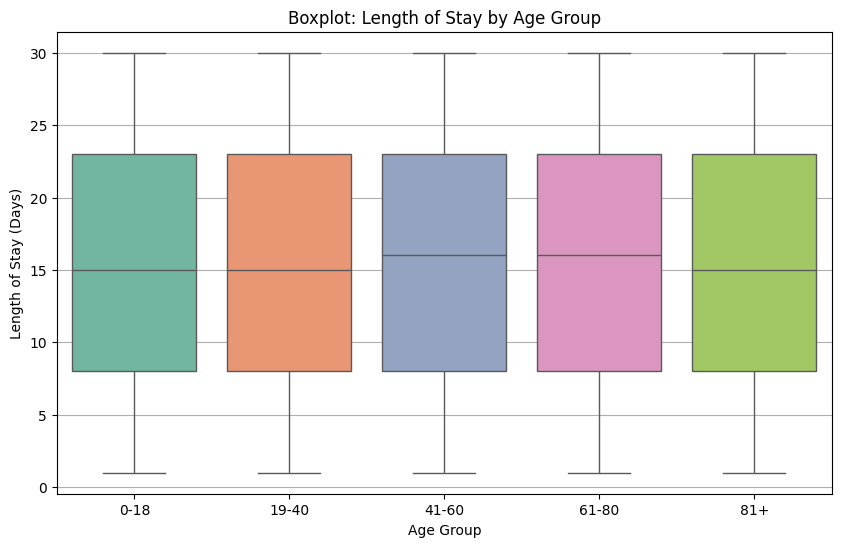

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create age bins for grouping
data2['Age Group'] = pd.cut(data2['Age'], bins=[0, 18, 40, 60, 80, 100], labels=['0-18', '19-40', '41-60', '61-80', '81+'])

# Boxplot for Length of Stay by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=data2, x='Age Group', y='Length of Stay', palette="Set2")
plt.title("Boxplot: Length of Stay by Age Group")
plt.ylabel("Length of Stay (Days)")
plt.xlabel("Age Group")
plt.grid(axis='y')
plt.show()


<ipython-input-12-afb05703fccd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_stay_by_age_group = data2.groupby('Age Group')['Length of Stay'].mean()


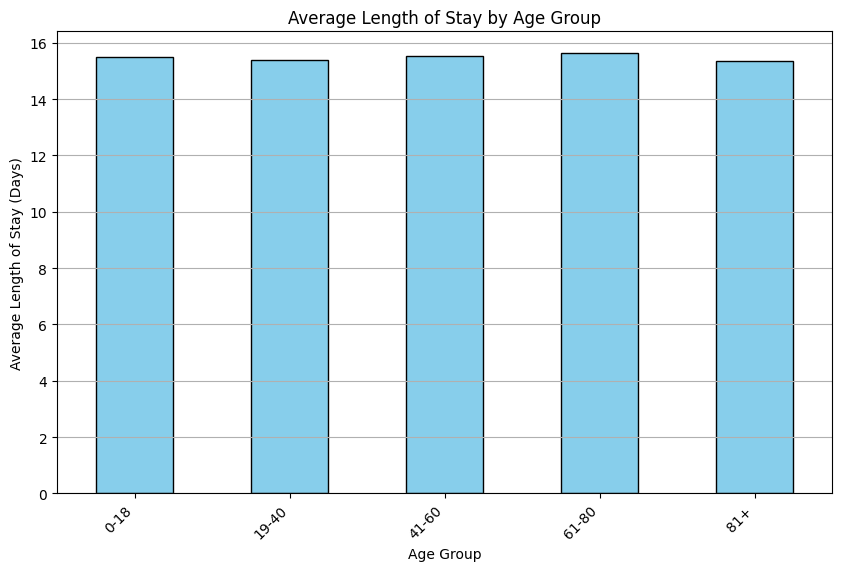

In [ ]:
# Calculate average Length of Stay by Age Group
avg_stay_by_age_group = data2.groupby('Age Group')['Length of Stay'].mean()

# Bar chart for Average Length of Stay by Age Group
plt.figure(figsize=(10, 6))
avg_stay_by_age_group.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Length of Stay by Age Group")
plt.ylabel("Average Length of Stay (Days)")
plt.xlabel("Age Group")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


**Plotting Heatmap for Average Length of Stay by Age Group and Medical Condition**

<ipython-input-13-407de2613e89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Age Group'] = pd.cut(data2['Age'], bins=[0, 18, 40, 60, 80, 100], labels=['0-18', '19-40', '41-60', '61-80', '81+'])
<ipython-input-13-407de2613e89>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data2.groupby(['Age Group', 'Medical Condition'])['Length of Stay'].mean().unstack()


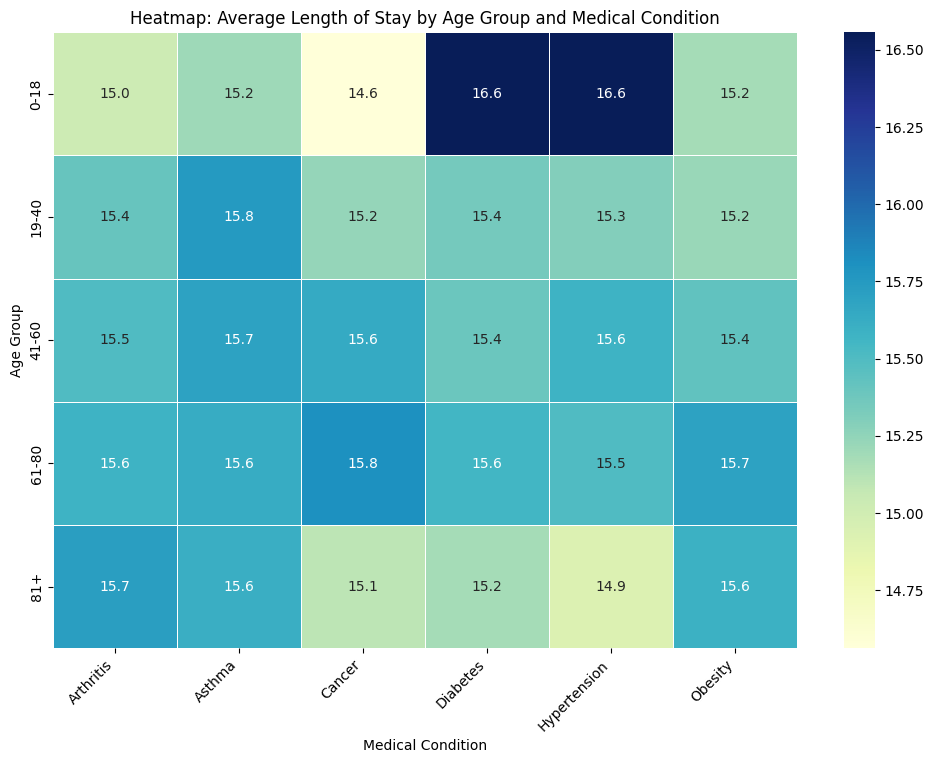

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create age bins for grouping
data2['Age Group'] = pd.cut(data2['Age'], bins=[0, 18, 40, 60, 80, 100], labels=['0-18', '19-40', '41-60', '61-80', '81+'])

# Group by Age Group and Medical Condition, and calculate the mean Length of Stay
heatmap_data = data2.groupby(['Age Group', 'Medical Condition'])['Length of Stay'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap: Average Length of Stay by Age Group and Medical Condition")
plt.ylabel("Age Group")
plt.xlabel("Medical Condition")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode Categorical Variables
categorical_columns = ['Gender', 'Medical Condition', 'Admission Type','Blood Type','Doctor', 'Hospital', 'Insurance Provider', 'Medication', 'Test Results', 'Age Group']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data2[col] = label_encoders[col].fit_transform(data2[col])

# Verify encoding
print(data2.dtypes)

# Step 2: Define Features and Target
X = data2.drop(columns=['Length of Stay', 'Date of Admission', 'Discharge Date', 'Name'])  # Exclude unnecessary columns
y = data2['Length of Stay']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data2[col] = label_encoders[col].fit_transform(data2[col])

# Verify that all columns in X are numeric
print(X.dtypes)




<ipython-input-14-872ebe5b7316>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = label_encoders[col].fit_transform(data2[col])
<ipython-input-14-872ebe5b7316>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = label_encoders[col].fit_transform(data2[col])
<ipython-input-14-872ebe5b7316>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

Name                          object
Age                            int64
Gender                         int64
Blood Type                     int64
Medical Condition              int64
Date of Admission     datetime64[ns]
Doctor                         int64
Hospital                       int64
Insurance Provider             int64
Billing Amount               float64
Room Number                    int64
Admission Type                 int64
Discharge Date        datetime64[ns]
Medication                     int64
Test Results                   int64
Length of Stay                 int64
Age Group                      int64
dtype: object
Age                     int64
Gender                  int64
Blood Type              int64
Medical Condition       int64
Doctor                  int64
Hospital                int64
Insurance Provider      int64
Billing Amount        float64
Room Number             int64
Admission Type          int64
Medication              int64
Test Results            int

<ipython-input-14-872ebe5b7316>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = label_encoders[col].fit_transform(data2[col])
<ipython-input-14-872ebe5b7316>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[col] = label_encoders[col].fit_transform(data2[col])
<ipython-input-14-872ebe5b7316>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 3: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 7.48893841348992
Mean Squared Error (MSE): 74.66033849802741
R-squared (R2): -0.00040564140997711995


The model is not able to explain the variance in the dataset, since the r-squared value is close to 0, which means the model is very bad at prediction of length of stay using blood type, gender and other independent variables.

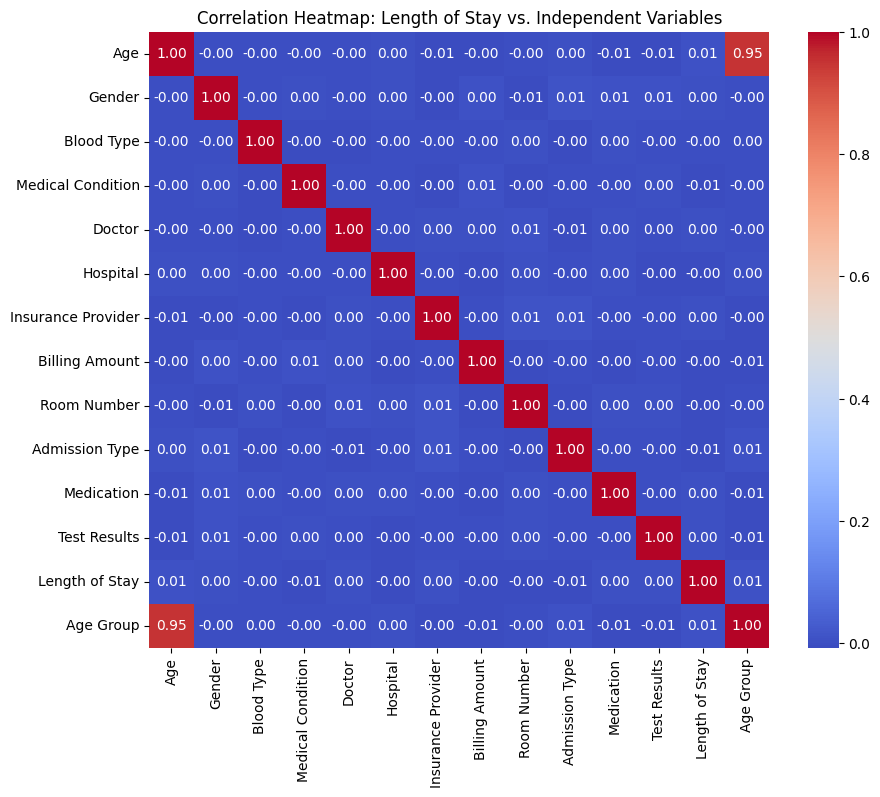

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # import pandas if not already imported

# Assuming 'data2' is your DataFrame
# Select only numeric columns for correlation
numeric_data2 = data2.select_dtypes(include=np.number)

# Calculate correlation matrix using only numeric columns
correlation_matrix = numeric_data2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Length of Stay vs. Independent Variables")
plt.show()

**Training The Model Using Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2): {r2_rf}")


Random Forest Model Performance:
Mean Absolute Error (MAE): 7.030180715585202
Mean Squared Error (MSE): 68.45250453608247
R-squared (R2): 0.08277576710493684
